# Student Performance Indicator 


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### Importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing the dataset 

In [2]:
import os
os.chdir("D:/All_the_Documents/Machine Learning Content/My_programs_VS_code/KN_machine_learning_projects")
df = pd.read_csv("notebook/data/stud.csv")

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# Handling the Missing Values
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Observations: There are no Missing values

In [6]:
df.duplicated().sum()

0

### Observations: There are no Duplicated values

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Observations: There are 5 categorical and 3 neumerical(int) type 

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observations: 
- In every subject the avereage performace of student is nearly same
- also the Standard deviation is same

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
# defining the neumerical and categorical columns

neu_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]


print(f"We have {len(neu_features)} neumerical features that are: {neu_features}")
print(f"We have {len(cat_features)} categorical features that are: {cat_features}")


We have 3 neumerical features that are: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features that are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns like Total Score, and Average Score 

In [12]:
# here we creating two additional columns to add meaningful insight to our data 
# this is intentional, it helps in traning the model better 
df["Total Score"] = df['math_score'] + df['writing_score'] + df['reading_score']
df["Average Score"] = (df['math_score'] + df['writing_score'] + df['reading_score']) / 3


In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = df[df['math_score'] == 100]["Average Score"].count() # just taking one columns
reading_full = df[df['reading_score'] == 100]["Average Score"].count() # just taking one columns
writing_full = df[df['writing_score'] == 100]["Average Score"].count() # just taking one columns

In [15]:
print(f"Number of Students Score full marks in Maths: {math_full}")
print(f"Number of Students Score full marks in Reading: {reading_full}")
print(f"Number of Students Score full marks in Writing: {writing_full}")

Number of Students Score full marks in Maths: 7
Number of Students Score full marks in Reading: 17
Number of Students Score full marks in Writing: 14


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['Average Score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average Score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Observations: 
- This Shows that Math Paper was comaritvely Tougher.
- Reading is the best Subject Performance.
  

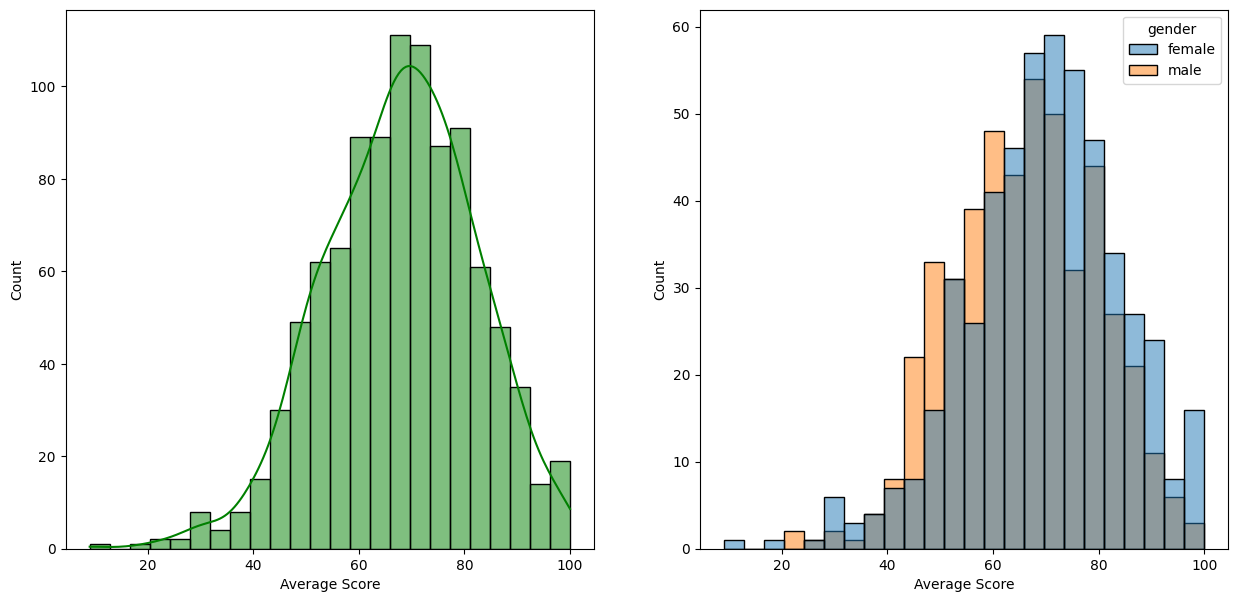

In [17]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average Score', kde = True, color= 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Average Score',  hue = 'gender')
plt.show()

### Observations: Female Students Perform better compared to Male student

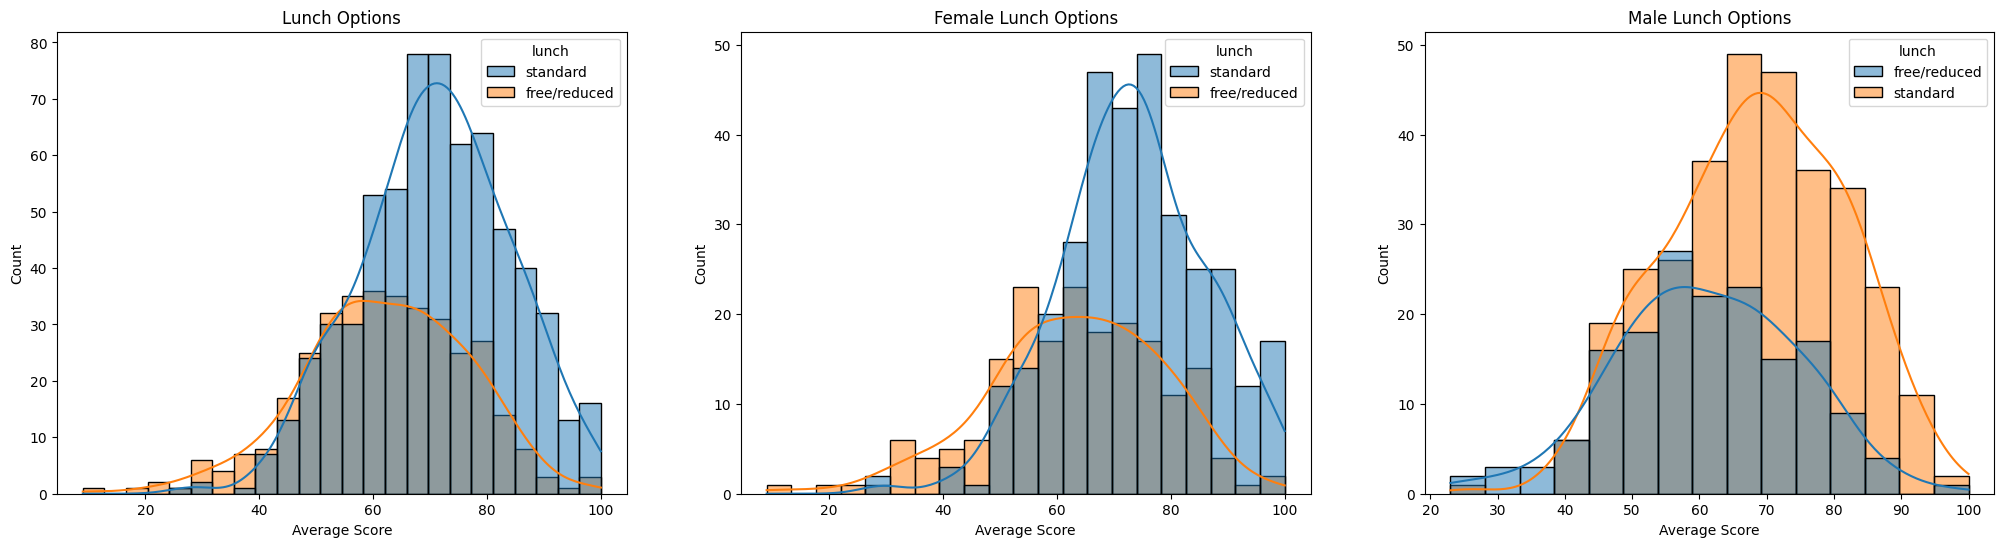

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
plt.title("Lunch Options")
sns.histplot(data=df, x='Average Score', kde=True, hue='lunch')

plt.subplot(132)
plt.title("Female Lunch Options")
sns.histplot(data=df[df.gender == 'female'], x='Average Score', kde=True, hue='lunch')

plt.subplot(133)
plt.title("Male Lunch Options")
sns.histplot(data=df[df.gender == 'male'], x='Average Score', kde=True, hue='lunch')

plt.show()


### Observations: 
People with Standard are performing better 

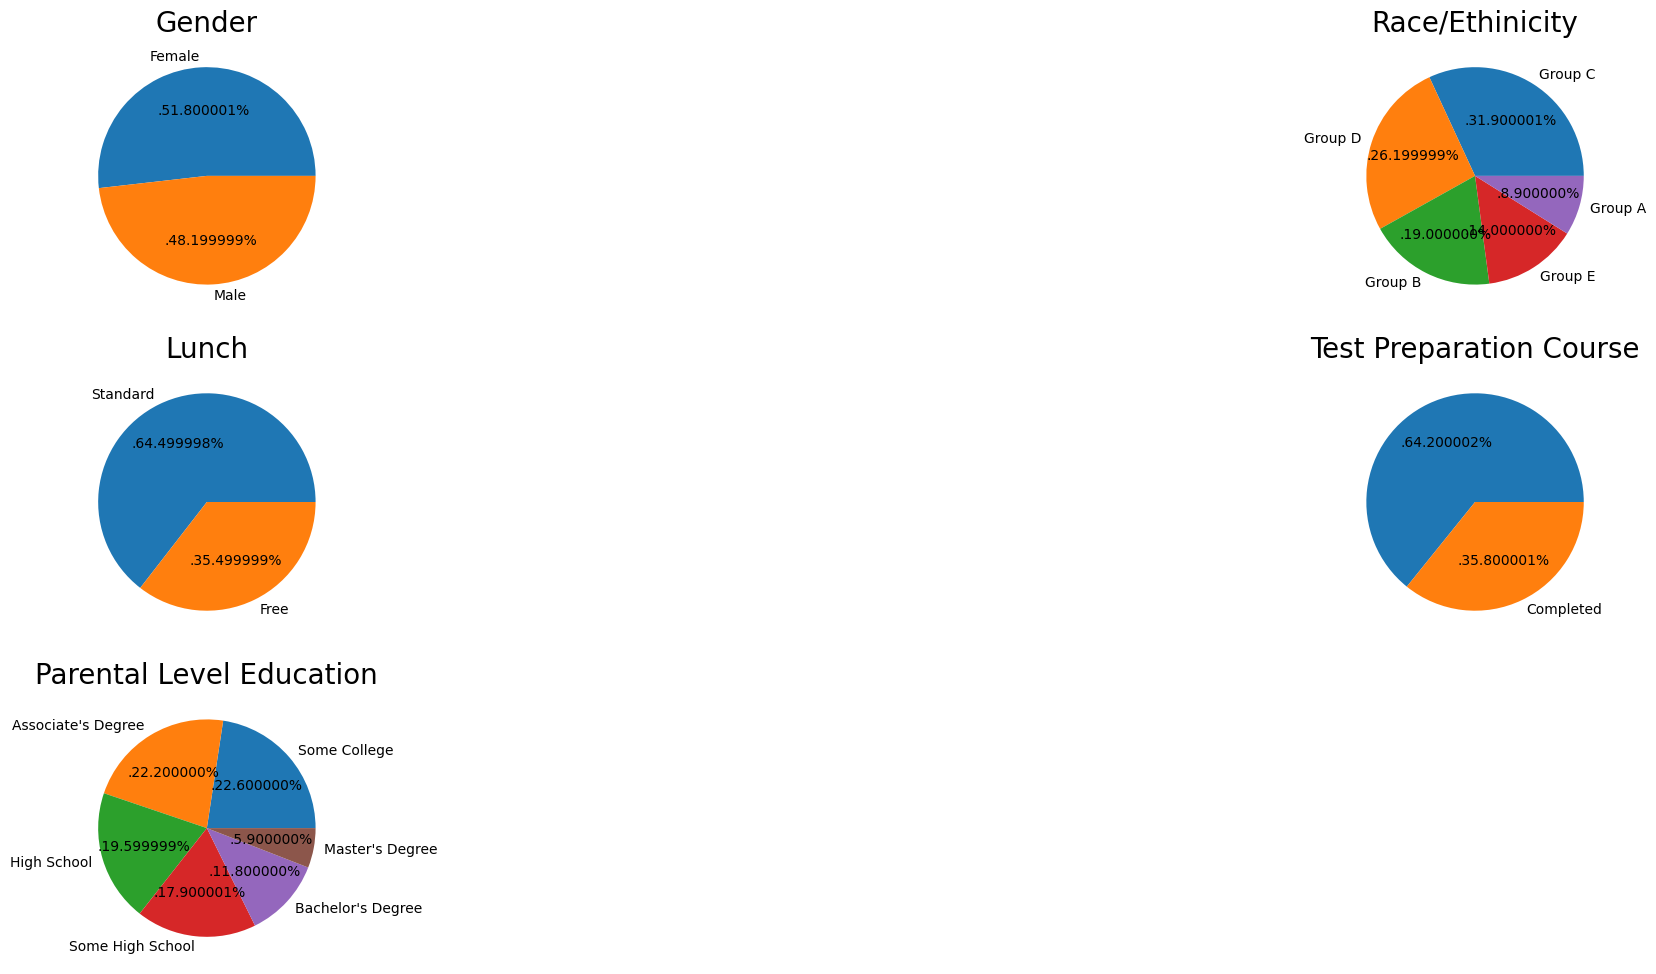

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)


plt.subplot(3,2,1)
size = df["gender"].value_counts()
labels = ['Female', "Male"]
color = ['red','green']

plt.pie(size, labels= labels, autopct= ".%2f%%")
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(3,2,2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, labels= labels, autopct= ".%2f%%")
plt.title('Race/Ethinicity', fontsize = 20)
plt.axis('off')


plt.subplot(3,2,3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red', 'green']

plt.pie(size, labels= labels, autopct= ".%2f%%")
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(3,2,4)
size = df['test_preparation_course'].value_counts()
labels = [None, 'Completed']
color = [ 'cyan','orange']

plt.pie(size, labels= labels, autopct= ".%2f%%")
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')


plt.subplot(3,2,5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree",
          'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange', 'yellow']

plt.pie(size, labels= labels, autopct= ".%2f%%")
plt.title('Parental Level Education', fontsize = 20)
plt.axis('off')


plt.show()


### Observation
- Male and Female students are almost in the same ratio.
- Group C has the highest number of people.
- Students have Standard lunh more.
- Students who don't have appeared in any course are greater.
- Parents completed their education with "Some Colleage" are greater compared to "Associate's Degree."

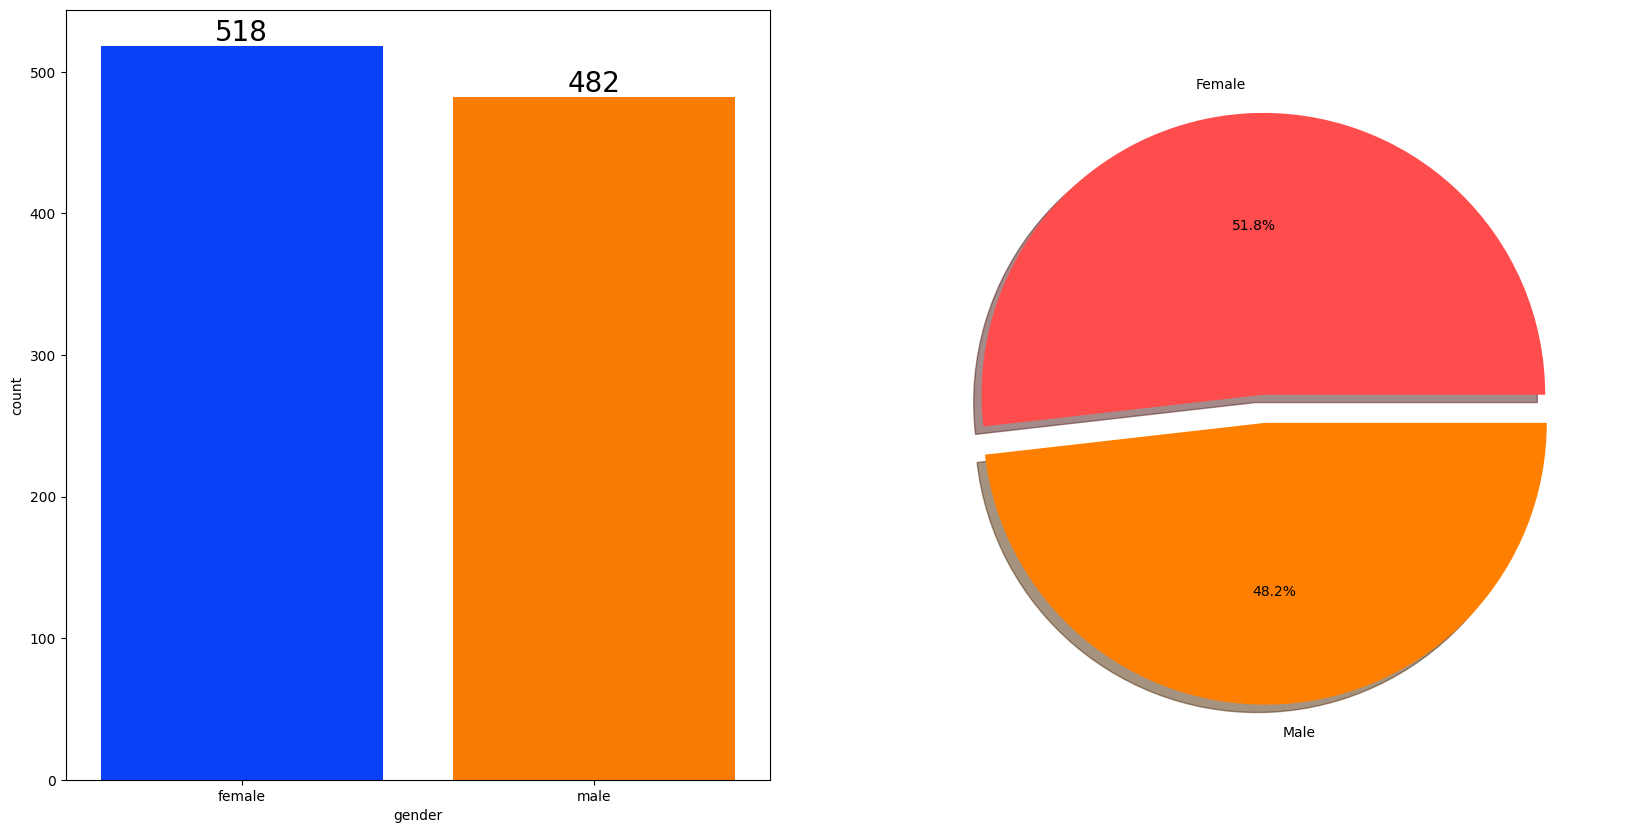

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='gender',data=df,palette ='bright',ax=ax[0],saturation=0.95)  
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Observation:
- Girls and Bodys have almost same ratio
- Specifically, Boys are 48% (482) and Girls are 51.8%(518)

In [33]:
# let's group the the students by the gender
print(df.columns)
gender_group_math = df.groupby('gender')['math_score'].mean()
gender_group_Total = df.groupby('gender')['Total Score'].mean()
print(gender_group_math)
print(gender_group_Total)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Score', 'Average Score'],
      dtype='object')
gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64
gender
female    208.708494
male      197.512448
Name: Total Score, dtype: float64


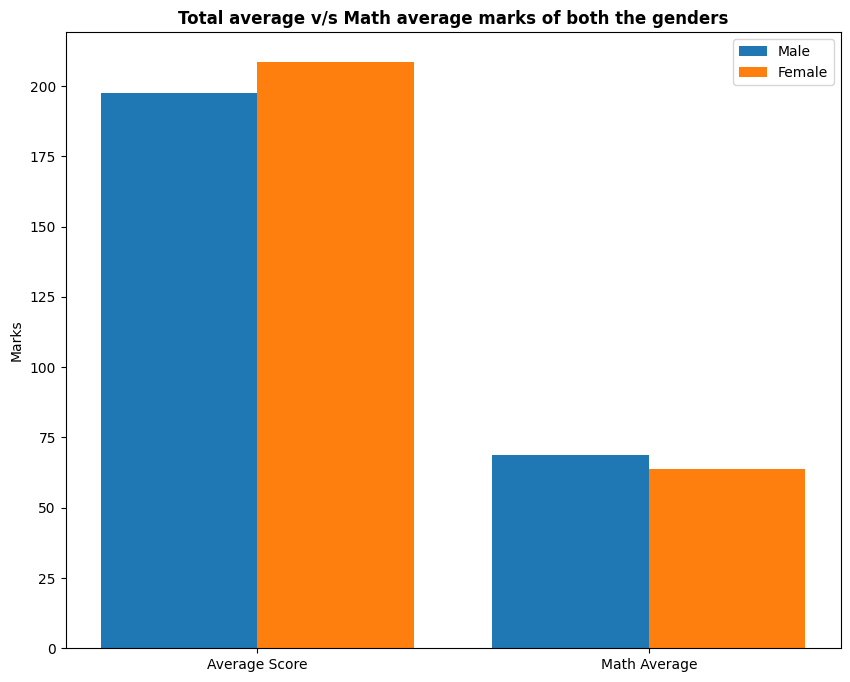

In [35]:
plt.figure(figsize=(10, 8))

X = ['Average Score','Math Average']


female_scores = [gender_group_Total[0], gender_group_math[0]]
male_scores = [gender_group_Total[1], gender_group_math[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Observation:
- we can say on an average male student has score better in maths.
- Meanwhile the average score of the girls is better than boys.

<BarContainer object of 5 artists>

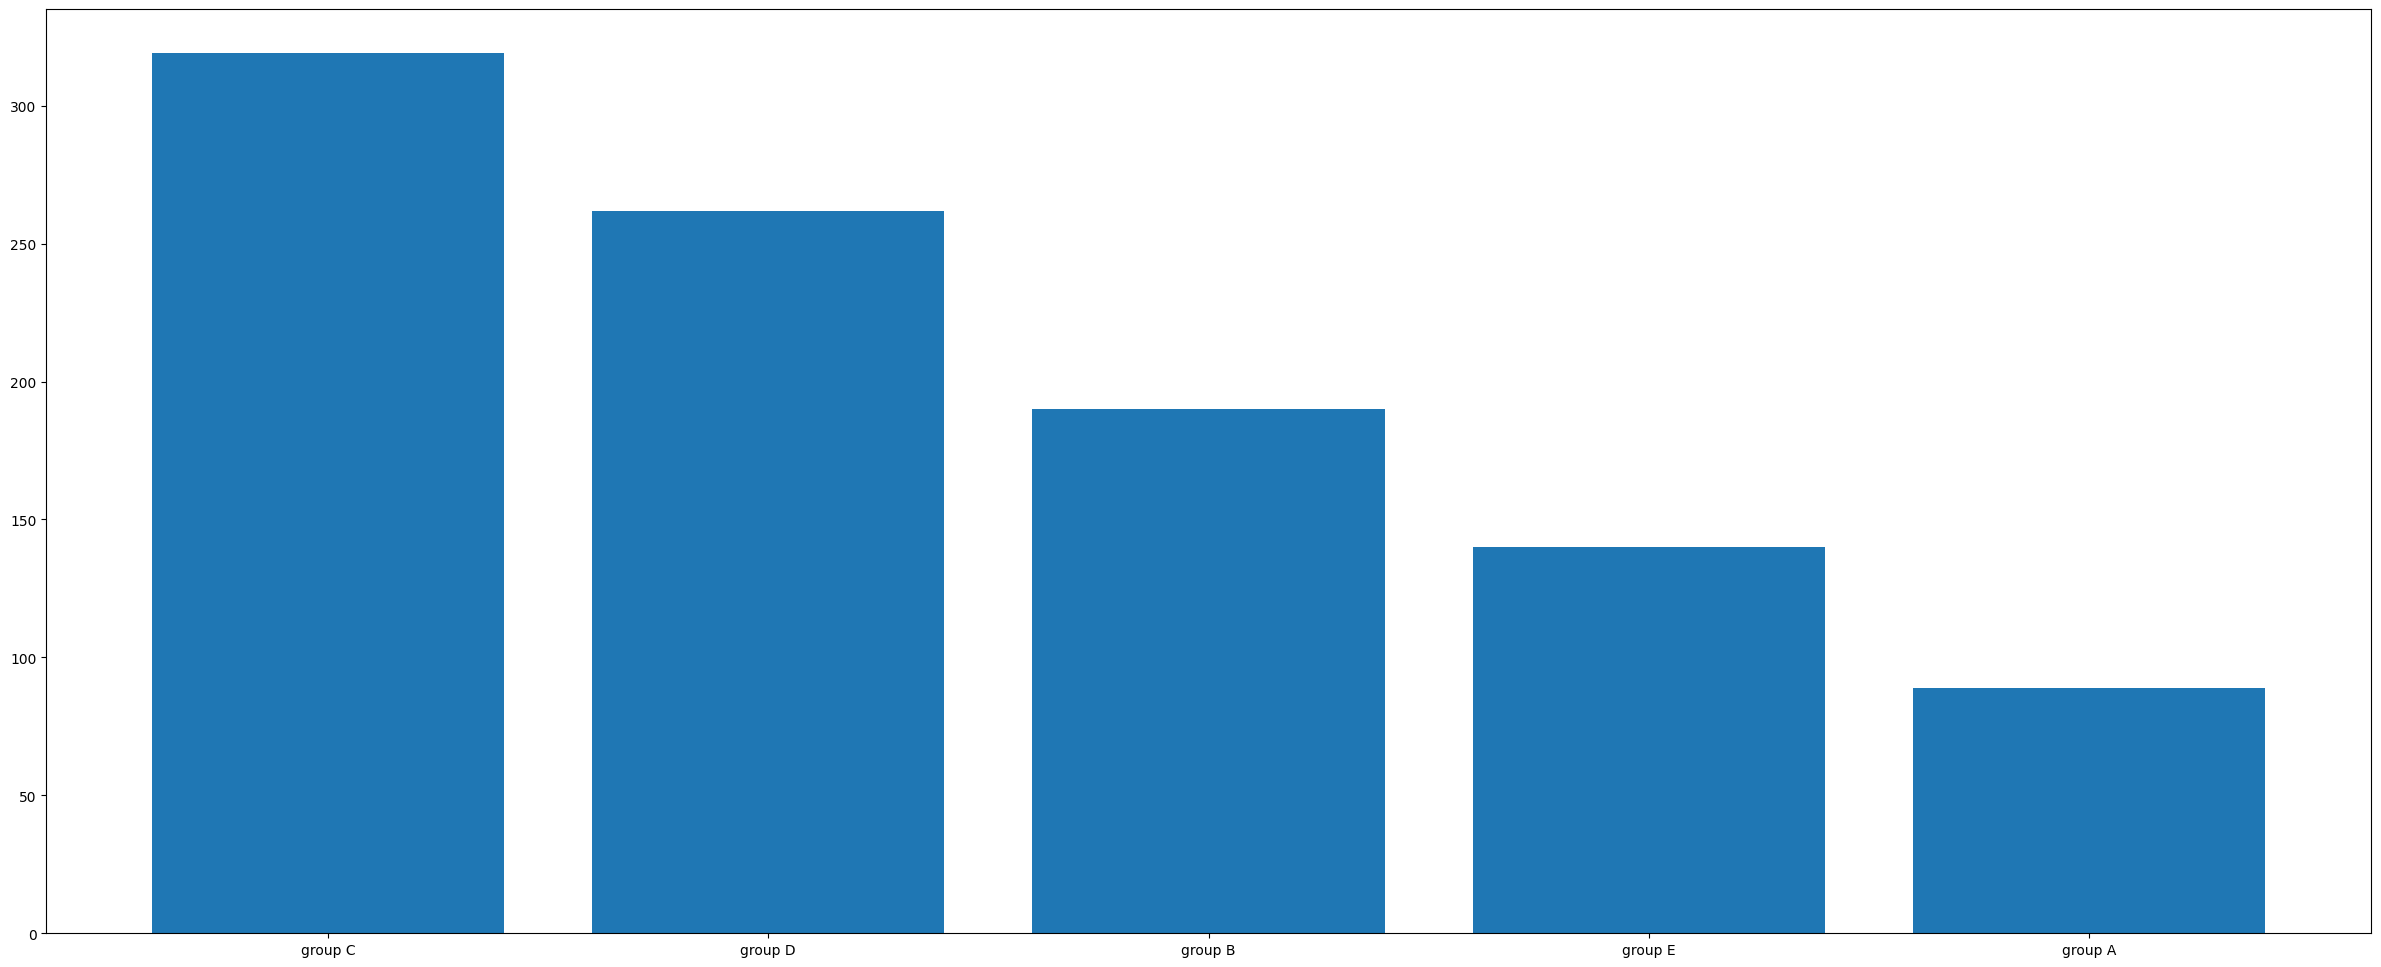

In [40]:
# # let's check if there is any dependency on the race and marks
# counts = df['race_ethnicity'].value_counts()

# plt.bar(
#     x = counts.index,
#     height = counts.values
# )


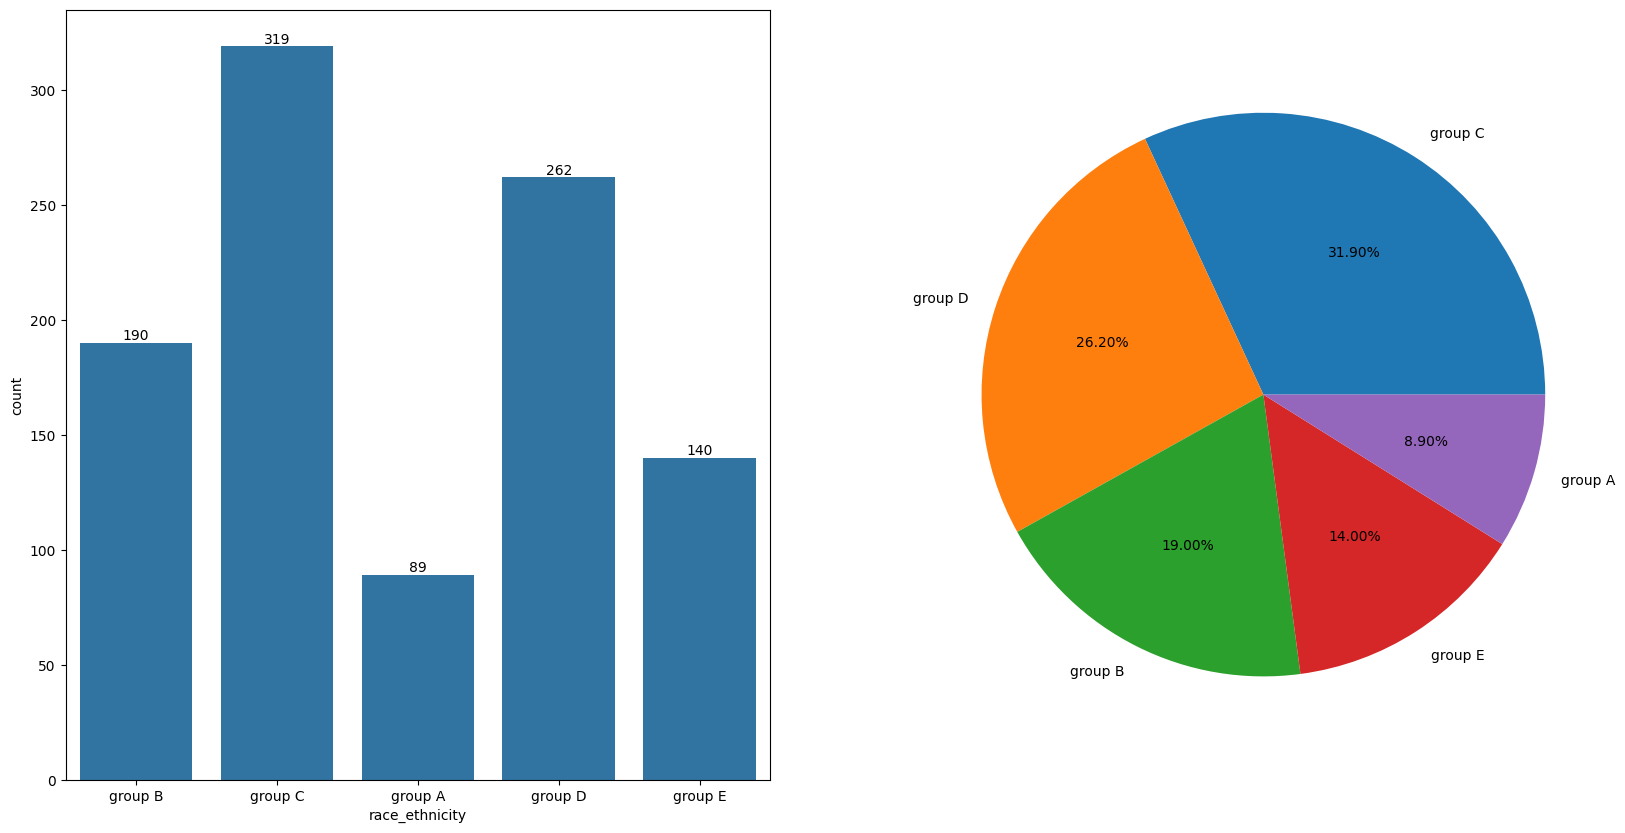

In [49]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(data=df, x='race_ethnicity', ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container)


counts = df['race_ethnicity'].value_counts()

plt.pie(
    counts.values,
    labels=counts.index,
    autopct="%.2f%%"
)
plt.show()

### Observation:
- We can observe that Group c is highest, then Group D.
- The lowest number of counts is in Group A.

In [53]:
# let's group the the students by the gender
print(df.columns)
gender_group_math = df.groupby('race_ethnicity')['math_score'].mean()
gender_group_Total = df.groupby('race_ethnicity')['Total Score'].mean()
print(gender_group_math)
print(gender_group_Total)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Score', 'Average Score'],
      dtype='object')
race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64
race_ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: Total Score, dtype: float64


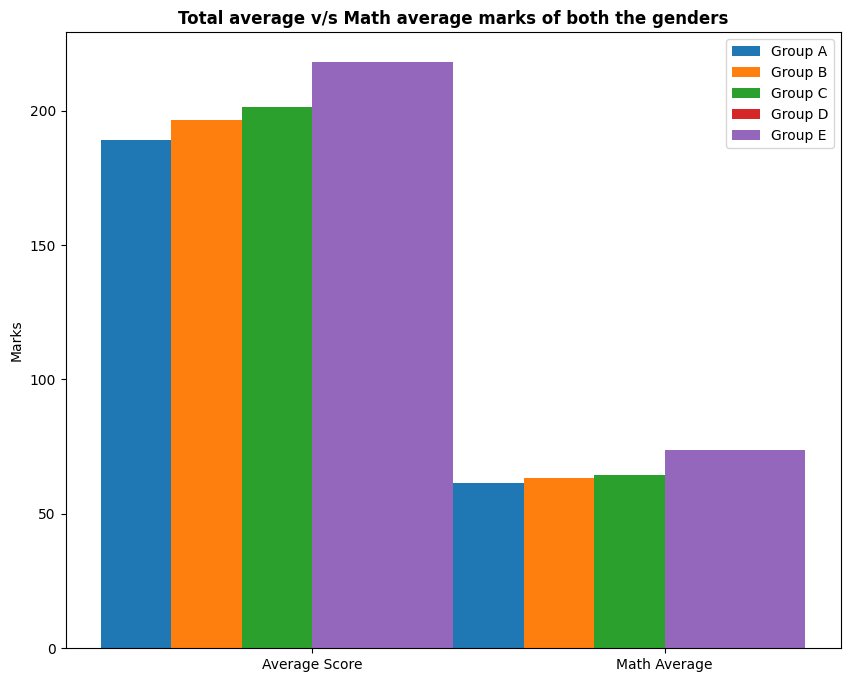

In [55]:
plt.figure(figsize=(10, 8))

X = ['Average Score','Math Average']


group_A = [gender_group_Total[0], gender_group_math[0]]
group_B = [gender_group_Total[1], gender_group_math[1]]
group_C = [gender_group_Total[2], gender_group_math[2]]
group_D= [gender_group_Total[3], gender_group_math[3]]
group_E = [gender_group_Total[4], gender_group_math[4]]
# male_scores = [gender_group_Total[1], gender_group_math[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.4, group_A, 0.4, label = 'Group A')
plt.bar(X_axis - 0.2, group_B, 0.4, label = 'Group B')
plt.bar(X_axis - 0, group_C, 0.4, label = 'Group C')
plt.bar(X_axis + 0.2, group_D, 0.4, label = 'Group D')
plt.bar(X_axis + 0.2, group_E, 0.4, label = 'Group E')
# plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Observation:
- On an average in both Total score and Math score Group E has perfomed the best and Group A student has performed the least.
- students with Lower socio economic background has performed better.

### How the Parental Education effects the score of the Students 

<Axes: xlabel='parental_level_of_education', ylabel='count'>

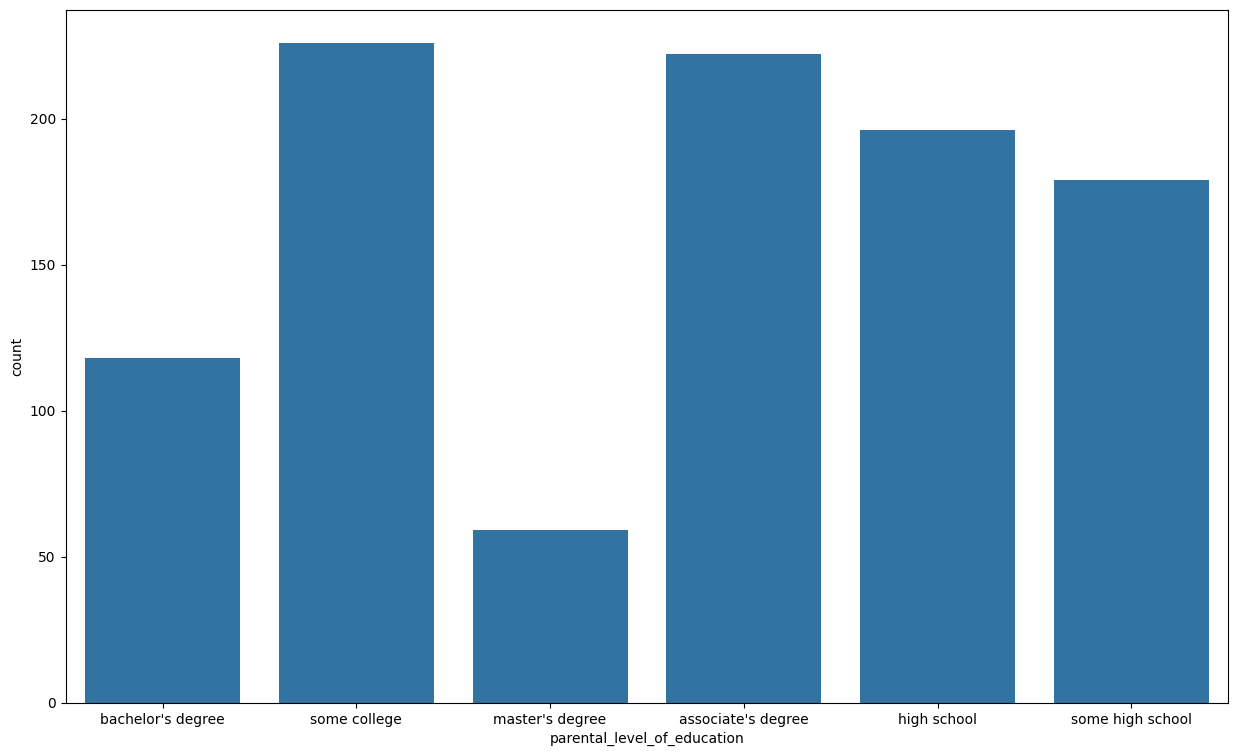

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data= df, x= 'parental_level_of_education')

### Observation:
- Parents with "Some College Degree" have the highest share.
- then comes parent with "Associate's degree".
- Parents with "Master's" Degree are lowest.

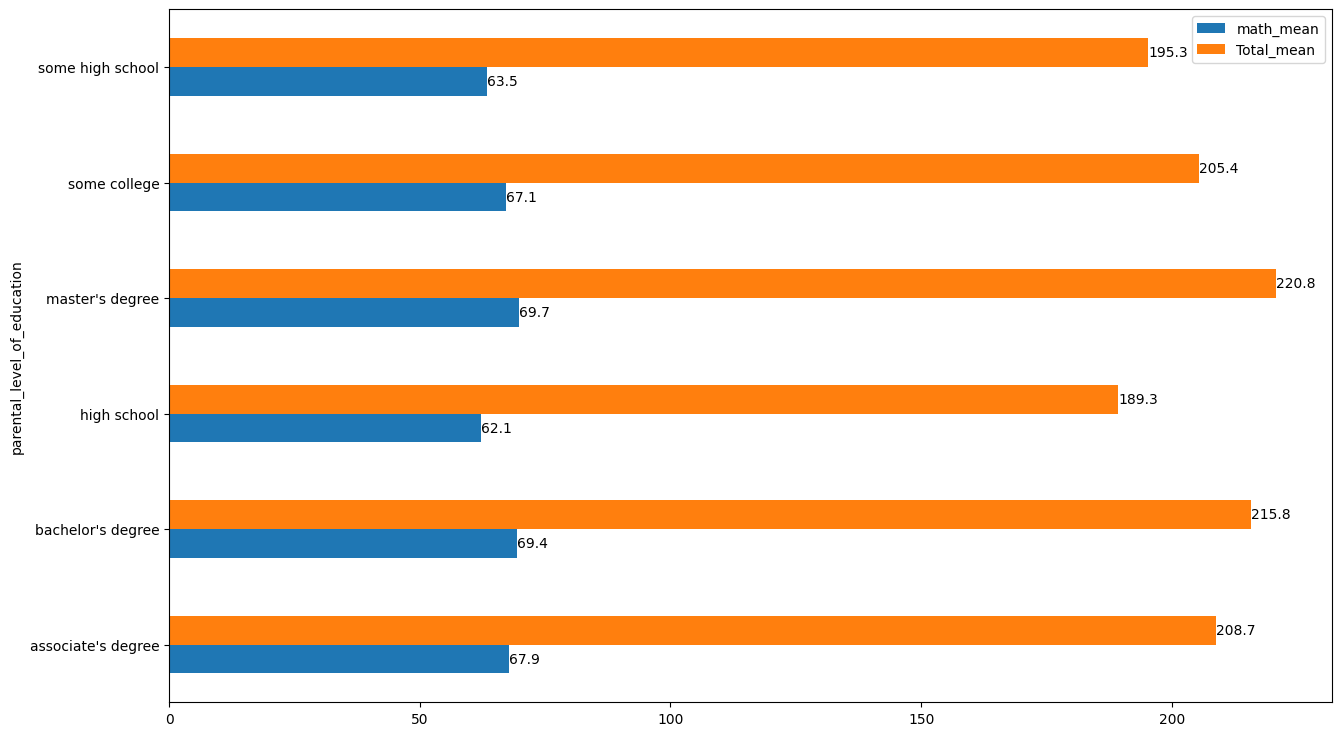

In [65]:
# let's the depency of there parent's degree on student's performances

ax = df.groupby('parental_level_of_education').agg(
    math_mean=('math_score', 'mean'),
    Total_mean=('Total Score', 'mean')
).plot(kind='barh')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')



### Observation:
- We can say parents with "Master's degree" or "Bechelor's Degree" are performing almost equally same.
- also, parents with "Master's degree" or "Bechelor's Degree" are scoring Highest.
- and parents with "high school" education are scoring Least.



### For the Lunch Part
- we have analysed that student's having Standard Results were perfroming better in the examination.

### Let's Check if there is any outliers

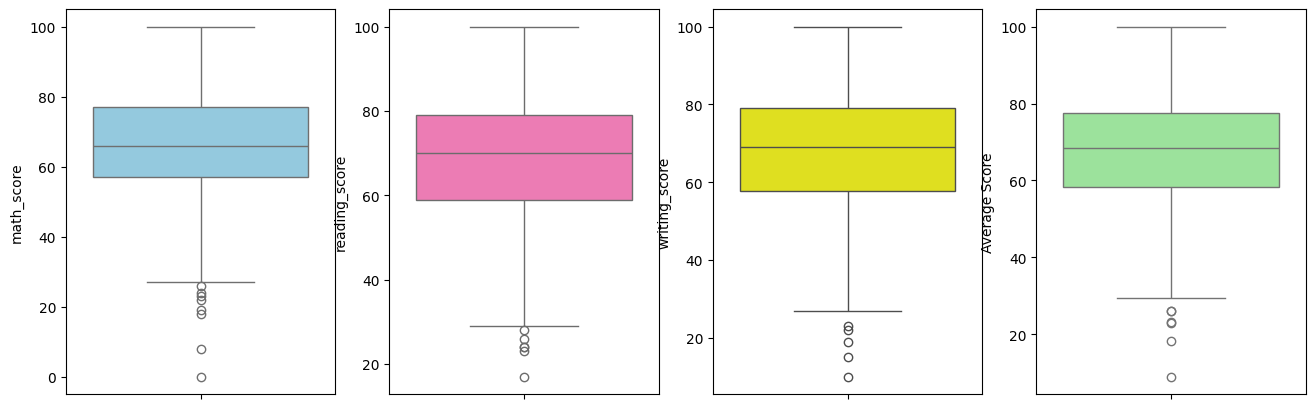

In [73]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')
plt.show()

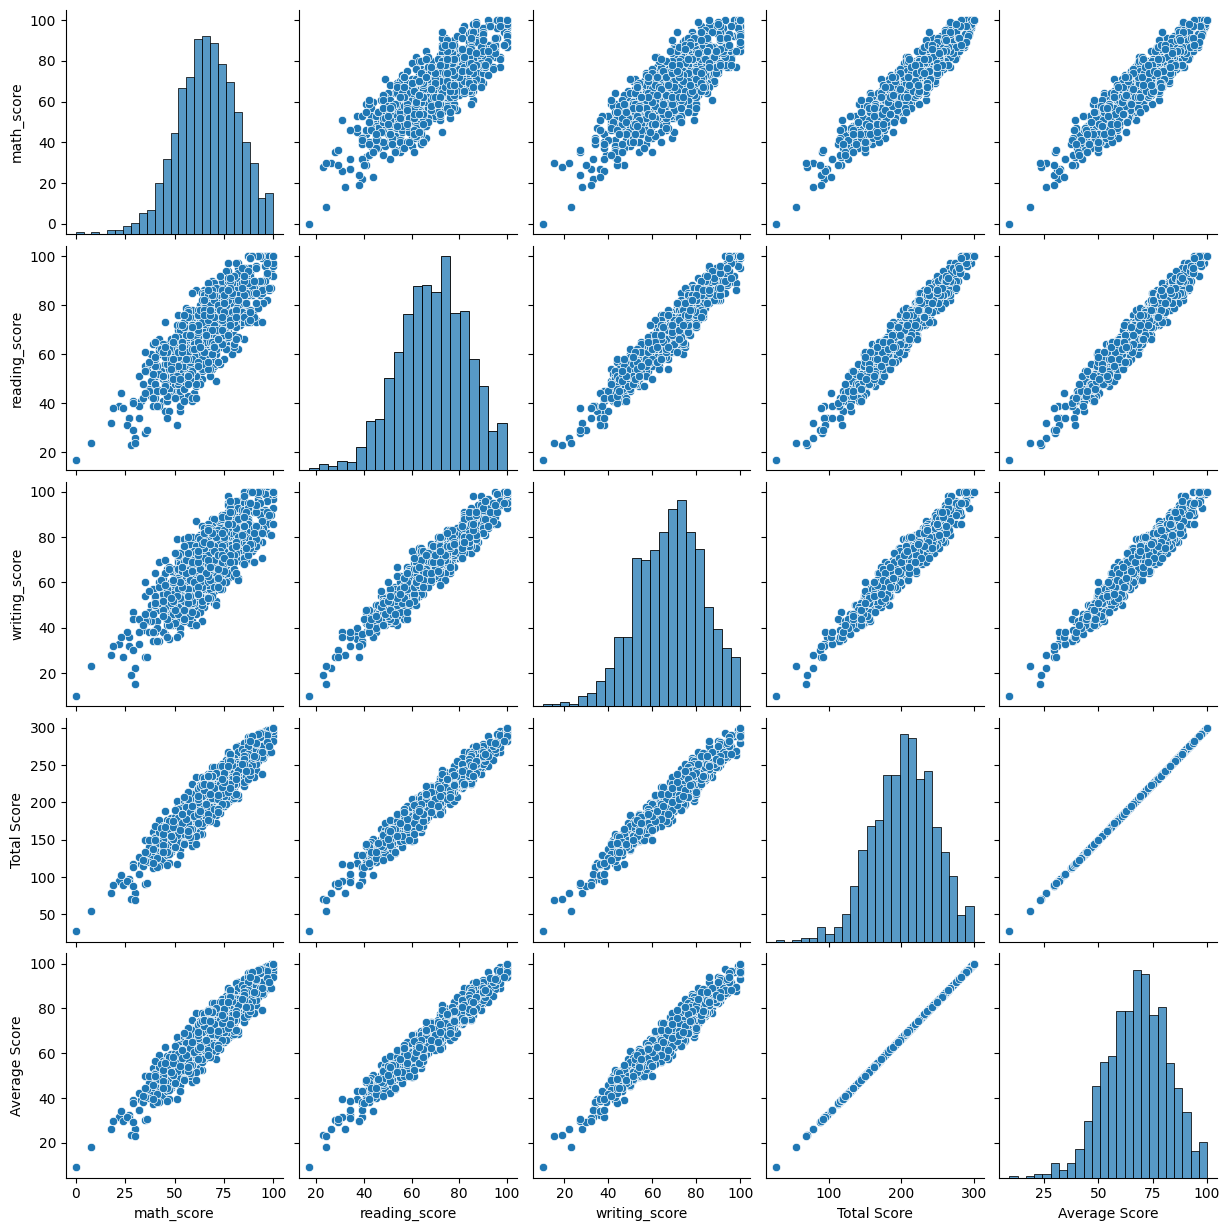

In [76]:
sns.pairplot(df)
plt.show()

### Observations:
- scores are increasing linearly with each other.
- There are some outliers in each of them.

### Final Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.